In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/lorenzolamas/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""

tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


In [4]:

tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


In [5]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [6]:
fdist.most_common(1)

[('is', 3)]

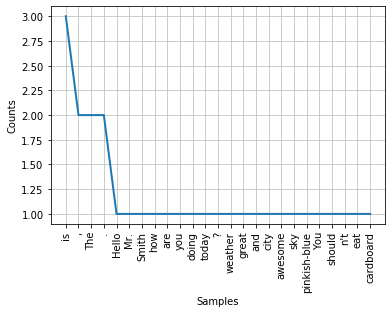

In [7]:
fdist.plot(30,cumulative=False)
plt.show()

In [9]:
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lorenzolamas/nltk_data...


{'mightn', 'under', 'both', 'more', 'whom', 'ain', 'them', 'were', "it's", "isn't", 'all', 'an', 'no', 'being', 'mustn', 'by', 'yourselves', 'that', 'ma', "you've", 'these', 'which', 'can', 'down', 'own', 'how', 'over', "won't", 'shan', "couldn't", 'when', 'here', 'wouldn', 'hadn', 'hasn', 'than', 'herself', 'be', 'been', "you'd", 'couldn', 'with', 'or', 'her', 'but', 'at', 'needn', 'won', 'who', 'some', 'once', 'as', "don't", 'has', 'they', "mightn't", 'me', 'ours', 'just', "she's", 'will', "you'll", 'nor', 'about', 'll', 'd', 'haven', 'now', "you're", 'should', 'into', 'such', 'himself', 'very', 'above', 'shouldn', 'had', 'there', "wouldn't", 'ourselves', 'm', 'myself', 'o', 'through', 've', 'where', 'few', 'having', 'yours', 're', 'what', 'too', 'between', 'while', 'each', 'didn', 'on', "weren't", 'his', 'our', 'theirs', 'before', 'after', 'only', 'those', 'have', 'below', "shan't", 'do', 'until', "didn't", 'doesn', 'i', "hadn't", 'out', 'a', 'further', "needn't", 'hers', 'off', "wa

[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']


In [11]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?', 'The', 'weather', 'great', ',', 'city', 'awesome', '.', 'The', 'sky', 'pinkish-blue', '.', 'You', "n't", 'eat', 'cardboard']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?', 'the', 'weather', 'great', ',', 'citi', 'awesom', '.', 'the', 'sky', 'pinkish-blu', '.', 'you', "n't", 'eat', 'cardboard']


In [15]:
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

Lemmatized Word: fly
Stemmed Word: fli


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/lorenzolamas/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vectorizer = CountVectorizer(max_features=10, stop_words="english", ngram_range=(1,2))

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
print(X.toarray())


['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


<4x9 sparse matrix of type '<class 'numpy.float64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [22]:
import pandas as pd
a = pd.DataFrame(data=X)
a

,0
0,"(0, 1)\t0.46979138557992045\n (0, 2)\t0.580..."
1,"(0, 5)\t0.5386476208856763\n (0, 1)\t0.6876..."
2,"(0, 4)\t0.511848512707169\n (0, 7)\t0.51184..."
3,"(0, 1)\t0.46979138557992045\n (0, 2)\t0.580..."
